## project 1

For the assignment I want to analyze the citations of the top article of Juan P Bello in google Scholar, A professor  of NYU in the Department of Audio Research and part of the leaderhsip of SONYC, a project aimed to measure and analyze noise data from the city of New York.

Using the institution name as the categorical variable. I want to Analyze and compare centrality across nodes.

My high level plan to do this is as follows.
 
- Visit https://scholar.google.de/citations?user=PMHXcoAAAAAJ&hl=en&oi=ao
- Crawl the first article’s citations.
- Grab the name of the researcher and institution, creating an edge.
- Crawl its citations and repeat 1 or 2 levels more.
- Analyze centrality in python.

A possible outcome will reveal a power player in Audio Research publishing, or will reveal some insight in the way researchers from a same publishing house cite each other, or how researchers share institutions in the Audio Research subject.

In [72]:
## all the imports

from bs4 import BeautifulSoup
import urllib2
from networkx import *
import re
import matplotlib.pyplot as plt



In [75]:
# the recursive method to grab the information for the node and load their citations.
def addNodeToGraph(graph, citationsID, num_citations, level):
    # set max depth to 2
    if (level > 1): 
        return 
    else:
      citations_count = 0
      while citations_count < num_citations:
         citations_request = urllib2.Request('https://scholar.google.com/scholar?cites='+str(citationsID)+'&start='+str(citations_count), headers={'User-Agent': 'Mozilla/5.0'})
         citations_page = urllib2.urlopen(citations_request)
         soup = BeautifulSoup(citations_page, "html.parser")
         
         # Get the block of  article
         cited = soup.findAll('div', attrs={'class': 'gs_ri'})
         
         # go to obtain the link that contains the id an citations
         for cite in cited:
             anchors = cite.findAll('div', {'class':'gs_fl'})
             #print anchor
             for anchor in anchors:
                 cite_link = anchor.findAll('a')[2]
                 article_id  = re.search(r'(?<=cites=)([0-9]*)', str(cite_link)).group(0)
                 citations  = re.search(r'(?<=Cited by )([0-9]*)', str(cite_link)).group(0)
                 
                 #increase the level to make recursion happen
                 level = level + 1
                 
                 # add the nodes to the graph
                 G.add_edge(citationsID, article_id)
                 
                 addNodeToGraph(graph, article_id, citations, level) 
         citations_count = citations_count + 10   

In [76]:
G=nx.Graph()


# specify the url
scrap_page = "https://scholar.google.de/citations?user=PMHXcoAAAAAJ&hl=en&oi=ao"

scrap_page_request = urllib2.Request(scrap_page , headers={'User-Agent': 'Mozilla/5.0'})
# query the website and return the html to the variable ‘page’
page = urllib2.urlopen(scrap_page_request)

# parse the html using beautiful soup and store in variable `soup`
soup = BeautifulSoup(page, "html.parser")

# Get the name of the first article
projectname = soup.find('a', attrs={'class': 'gsc_a_at'})
seed_name = projectname.text


#grab the citations link, this way we will capture all the citations from the seed article
citations = soup.find('a', attrs={'class': 'gsc_a_ac'})
scrap_page =  citations['href']
initial_id  = re.search(r'(?<=cites=)([0-9]*)', scrap_page).group(0)

#get the number of initial citations to divide the pagination link and grab all links.
initial_citations = int(citations.text)

# trigger the recursive method
addNodeToGraph(graph, initial_id, initial_citations, 0)


<a href="/scholar?cites=2180689887541232824&amp;as_sdt=2005&amp;sciodt=0,5&amp;hl=en">Cited by 584</a>
2180689887541232824
584
<a href="/scholar?cites=17303095556081160855&amp;as_sdt=2005&amp;sciodt=0,5&amp;hl=en">Cited by 1035</a>
17303095556081160855
1035
<a href="/scholar?cites=5688487003992563075&amp;as_sdt=2005&amp;sciodt=0,5&amp;hl=en">Cited by 1021</a>
5688487003992563075
1021
<a href="/scholar?cites=5271707213238462102&amp;as_sdt=2005&amp;sciodt=0,5&amp;hl=en">Cited by 298</a>
5271707213238462102
298
<a href="/scholar?cites=17626062134216764614&amp;as_sdt=2005&amp;sciodt=0,5&amp;hl=en">Cited by 251</a>
17626062134216764614
251
<a href="/scholar?cites=16009385282336185540&amp;as_sdt=2005&amp;sciodt=0,5&amp;hl=en">Cited by 229</a>
16009385282336185540
229
<a href="/scholar?cites=15799618511910563579&amp;as_sdt=2005&amp;sciodt=0,5&amp;hl=en">Cited by 220</a>
15799618511910563579
220
<a href="/scholar?cites=2918827222802944955&amp;as_sdt=2005&amp;sciodt=0,5&amp;hl=en">Cited by 207<

HTTPError: HTTP Error 503: Service Unavailable

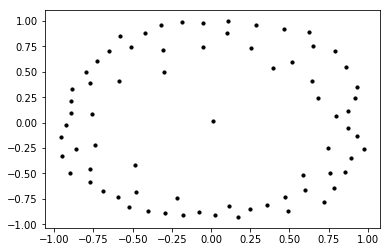

In [79]:
print(G)

pos=nx.spring_layout(G,k=1,iterations=20)


#print(efulldistrust)
#print(etrust)
# nodes
nx.draw_networkx_nodes(G,pos,node_size=10, node_color="black" )

# edges

#nx.draw_networkx_edges(G,pos,edgelist=efulldistrust,
#                    width=1)
#nx.draw_networkx_edges(G,pos,edgelist=edistrust,
#                    width=1,alpha=1,edge_color='b',style='dashed')
#
#nx.draw_networkx_edges(G,pos,edgelist=etrust,
#                    width=1,edge_color='g')
#nx.draw_networkx_edges(G,pos,edgelist=efulltrust,
#                    width=1,alpha=.01,edge_color='r',style='dashed')

#nx.draw_networkx(G)

#nx.draw_random(G)  

plt.show()

In [80]:
pathlengths=[]

for v in G.nodes():
    spl=single_source_shortest_path_length(G,v)
    for p in spl.values():
        pathlengths.append(p)

print("average shortest path length %s" % (sum(pathlengths)/len(pathlengths)))

average shortest path length 1


In [82]:
dist={}
for p in pathlengths:
    if p in dist:
        dist[p]+=1
    else:
        dist[p]=1

print('')
print("length #paths")
verts=dist.keys()
for d in sorted(verts):
    print('%s %d' % (d,dist[d]))

print("radius: %d" % radius(G))
print("diameter: %d" % diameter(G))
print("eccentricity: %s" % eccentricity(G))
print("center: %s" % center(G))
print("periphery: %s" % periphery(G))
print("density: %s" % density(G))
print("betweenness centrality: %s" % betweenness_centrality(G))


length #paths
0 72
1 142
2 4970
radius: 1
diameter: 2
eccentricity: {'16556391236369142194': 2, '15695716849180709593': 2, '9346494956542204438': 2, '11323820407478271997': 2, '10438406953689636585': 2, '5271707213238462102': 2, '2123827718367881445': 2, '15380270100375207934': 2, '8340411633023951628': 2, '2918827222802944955': 2, '1250769124056359193': 2, '13465639661612904608': 2, '16757144193294965333': 2, '2180689887541232824': 1, '17861433184880697423': 2, '7578414771733407550': 2, '11672646924707668162': 2, '16323365055084440920': 2, '16352331225608186366': 2, '11115187820332455337': 2, '8138308218759130601': 2, '4368793991073848995': 2, '2364867594323273521': 2, '3652287417947866284': 2, '17862748685320933303': 2, '8287761168599219302': 2, '17984788585265646229': 2, '5260860070651435248': 2, '15799618511910563579': 2, '6941973691295802234': 2, '7848449195611975793': 2, '10321157640931933114': 2, '2567041343196581180': 2, '3431435570935455050': 2, '17443455746489093234': 2, '12

## conclusions

i wasn't counting with the fact that google were restricting access to its server after so few requests, less than 100 were effective before the response resulted in 503 service unavailable.

After calculating centrality, the node with the only positive value of 1.0 appears to be this book (https://books.google.de/books?hl=en&lr=&id=AF30yR41GIAC&oi=fnd&pg=PP9&ots=Ontc8iTgME&sig=Db3WNxgxUP_jPPsg0ERedPZ8w9s#v=onepage&q&f=false) about Signal Processing Methods for auidio from 2007 that have trascended most research papers and became a reference in the topic.

The results were very interesting, it seems like a really good way to obtain consensus or cross-reference in ample topics. I'll work on a proxy-powered version to obtain more info about this.